## ЧАСТЬ C

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import umap
import umap.plot
from collections import Counter

## Извлечение датасета

In [2]:
#Заголовки данных согласно файлу с описанием glass.tag --Variant 11
data_headers = ["ID", "RI", "NA2O", "MGO", "AL2O3", "SIO2", "K2O", "CAO", "BAO", "FE2O3", "TYPE"]
data = pd.read_csv('C:/Учеба/Мага/1 семестр/Интеллектуальные системы и технологии/Практика 3-4/glass.data', names=data_headers)
data.head(10)

,ID,RI,NA2O,MGO,AL2O3,SIO2,K2O,CAO,BAO,FE2O3,TYPE
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Соответствие значений столбца TYPE и названий типов

In [3]:
types = data.iloc[:,10]
types_name = {1: "building_windows_float_processed",
            2 : "building_windows_non_float_processed",
            3 : "vehicle_windows_float_processed",
            5 : "containers",
            6 : "tableware",
            7 :"headlamps"}

## Разбиваем данные на обучающую и тестовую выборку

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:-1].values,
                                                    types,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    stratify=types,
                                                    random_state=151)

## Обучение knn классификатора

In [5]:
rf_class = RandomForestClassifier(n_estimators=19,
                           criterion='gini',
                           max_features = 'sqrt',
                           min_samples_split = 4,
                           min_samples_leaf=2).fit(X_train, y_train)

Точность предсказания, Precision, Recall, F1 measure для обучающей выборки \
Accuracy: 0.9664429530201343\
Precision: 0.9673626646781008\
Recall: 0.9664429530201343\
F1 measure: 0.9664817103208535

Точность предсказания, Precision, Recall, F1 measure для тестовой выборки\
Accuracy: 0.8\
Precision: 0.8207100591715977\
Recall: 0.8\
F1 measure: 0.7863996662494784

## Предсказание на тестовой выборке

In [6]:
y_test_pred = rf_class.predict(X_test)

## Точность предсказания, Precision, Recall, F1 measure для обучающей выборки

In [7]:
from sklearn import metrics
y_train_pred = rf_class.predict(X_train)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_train, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_train, y_train_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:", metrics.f1_score(y_train, y_train_pred, average='weighted'))

Accuracy: 0.9664429530201343
Precision: 0.9673626646781008
Recall: 0.9664429530201343
F1 measure: 0.9664817103208535


## Точность предсказания, Precision, Recall, F1 measure для тестовой выборки

In [8]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_test_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("F1 measure:",metrics.f1_score(y_test, y_test_pred, average='weighted'))

Accuracy: 0.8
Precision: 0.8207100591715977
Recall: 0.8
F1 measure: 0.7863996662494784


## Grid search

In [9]:
grid_params = {
    'n_estimators' : list(range(3,20)),
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : list(range(1,10)),
    'min_samples_split' : list(range(2,5))
}

gs = GridSearchCV(RandomForestClassifier(),
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1)

gs_results = gs.fit(X_train, y_train)
# Fitting 3 folds for each of 2754 candidates, totalling 8262 fits

Fitting 3 folds for each of 2754 candidates, totalling 8262 fits


In [10]:
gs_results.best_score_
#0.7651700680272109

0.7582312925170068

In [11]:
gs_results.best_estimator_
#RandomForestClassifier(max_features='log2', n_estimators=19)

RandomForestClassifier(min_samples_split=3, n_estimators=13)

In [12]:
gs_results.best_params_
#{'criterion': 'gini',
# 'max_features': 'log2',
# 'min_samples_leaf': 1,
# 'min_samples_split': 2,
# 'n_estimators': 19}

{'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 13}

## Снижение размерности обучающих данных для рисования при помощи TSNE

In [13]:
train_tsne = TSNE(init='random', perplexity=15.0, random_state = 151).fit_transform(X_train)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of training data')]

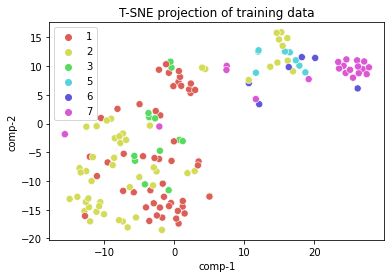

In [14]:
train_tsne_df = pd.DataFrame()
train_tsne_df["y"] = y_train
train_tsne_df["comp-1"] = train_tsne[:,0]
train_tsne_df["comp-2"] = train_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=train_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(train_tsne_df.y.tolist()))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of training data") 

## Отображение результата классификации обучающего набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on training data')]

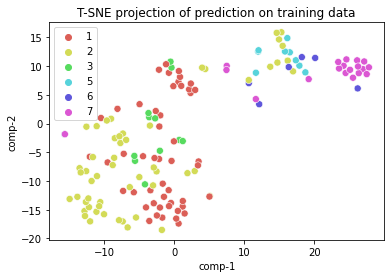

In [15]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_train_pred,
                palette=sns.color_palette("hls", len(Counter(y_train_pred))),
                data=train_tsne_df,
                s=50).set(title="T-SNE projection of prediction on training data") 

## Снижение размерности тестовых данных для отображения при помощи TSNE

In [16]:
test_tsne = TSNE(init='random', perplexity=15.0, random_state = 151).fit_transform(X_test)

c:\users\fisen\appdata\local\programs\python\python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


## Отображение тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of test data')]

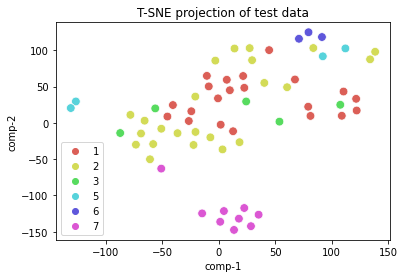

In [17]:
test_tsne_df = pd.DataFrame()
test_tsne_df["y"] = y_test
test_tsne_df["comp-1"] = test_tsne[:,0]
test_tsne_df["comp-2"] = test_tsne[:,1]
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=test_tsne_df.y.tolist(),
                palette=sns.color_palette("hls", len(Counter(test_tsne_df.y.tolist()))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of test data") 

## Отображение результата классификации тестового набора данных

[Text(0.5, 1.0, 'T-SNE projection of prediction on test data')]

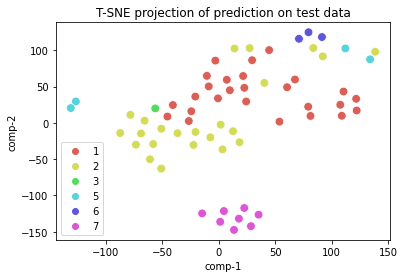

In [18]:
sns.scatterplot(x="comp-1",
                y="comp-2",
                hue=y_test_pred,
                palette=sns.color_palette("hls", len(Counter(y_test_pred))),
                data=test_tsne_df,
                s=75).set(title="T-SNE projection of prediction on test data") 

## Примечания

В датасете представлено 6 категорий стекол:

1: "building_windows_float_processed" - 70 экземпляров

2 : "building_windows_non_float_processed" - 76 экземпляров

3 : "vehicle_windows_float_processed" - 17 экземпляров

5 : "containers" - 13 экземпляров

6 : "tableware" - 9 экземпляров

7 :"headlamps" - 29 экземпляров

Первые две категории преобладают над остальными данными, в связи с чем объекты некоторых классов попадают в другие классы.

## Вывод
Лучшим классификатором для имеющегося набора данных является Random Forest классификатор, он показывает наилучшую точность в предсказании данных. Также важно подметить, что отдельные классы не поглощаются другимим